In [3]:
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs #Coordinate System
import cartopy.feature as cfeature
from scipy.io import netcdf
from IPython.display import HTML

In [4]:
data = Dataset(r'cyg03.ddmi.s20220918-000000-e20220918-235959.l1.power-brcs.a31.d32.nc') #r = rate
#print(data.variables.keys())

#for var in data.variables.values():
#    print(var)

In [5]:
ds = xr.open_dataset('cyg03.ddmi.s20220918-000000-e20220918-235959.l1.power-brcs.a31.d32.nc')
ds

<xarray.Dataset>
Dimensions:                          (sample: 172184, ddm: 4, delay: 17, doppler: 11)
Coordinates:
  * sample                           (sample) int32 0 1 2 ... 172182 172183
  * ddm                              (ddm) int8 0 1 2 3
    ddm_timestamp_utc                (sample) datetime64[ns] ...
    sp_lat                           (sample, ddm) float32 ...
    sp_lon                           (sample, ddm) float32 ...
Dimensions without coordinates: delay, doppler
Data variables: (12/126)
    spacecraft_id                    int16 ...
    spacecraft_num                   int8 ...
    ddm_source                       int8 ...
    ddm_time_type_selector           int8 ...
    delay_resolution                 float32 ...
    dopp_resolution                  float32 ...
    ...                               ...
    quality_flags                    (sample, ddm) float64 ...
    quality_flags_2                  (sample, ddm) float64 ...
    raw_counts                       (sample, ddm, delay, doppler) float64 ...
    power_analog                     (sample, ddm, delay, doppler) float32 ...
    brcs                             (sample, ddm, delay, doppler) float32 ...
    eff_scatter                      (sample, ddm, delay, doppler) float32 ...
Attributes: (12/66)
    Conventions:                          CF-1.6, ACDD-1.3, ISO-8601
    standard_name_vocabulary:             CF Standard Name Table v30
    project:                              CYGNSS
    featureType:                          trajectory
    summary:                              CYGNSS is a NASA Earth Venture miss...
    program:                              CYGNSS
    ...                                   ...
    geospatial_lon_max:                   360.000E
    time_coverage_resolution:             P0DT0H0M1S
    time_coverage_start:                  2022-09-18T00:00:00.499261595Z
    time_coverage_end:                    2022-09-18T23:59:59.999261608Z
    time_coverage_duration:               P1DT0H0M0S
    NCO:                                  4.4.4

In [6]:
spacecraft_id = data.variables['spacecraft_id']
#data.variables['sp_lat']
#data.variables['sc_lat']

In [9]:
lat = data.variables['sc_lat'][:]
lat_len = len(lat)
lon = data.variables['sc_lon'][:]
lon_len = len(lon)
alt = data.variables['sc_alt'][:]
alt_len = len(alt)
time = data.variables['ddm_timestamp_utc'][:]
time_len = len(time)

In [10]:
print (lat)
print (lon)
print (time)
print (lat_len)
print (lon_len)
print (time_len)
#print (spacecraft_id)

[ 25.433258  25.419817  25.40639  ... -12.998617 -13.015864 -13.03311 ]
[114.76621 114.79587 114.82552 ... 169.28778 169.31303 169.33829]
[0.00000000e+00 5.00000039e-01 1.00000002e+00 ... 8.63985000e+04
 8.63990000e+04 8.63995000e+04]
172184
172184
172184


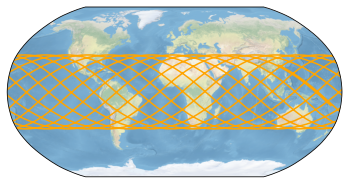

In [13]:
ax = plt.axes(projection=ccrs.Robinson(0))
ax.stock_img()

# Save the plot by calling plt.savefig() BEFORE plt.show()
#plt.savefig('coastlines.pdf')
#plt.savefig('coastlines.png')

plt.plot(lon, lat, color='orange', transform=ccrs.Geodetic())
plt.show()

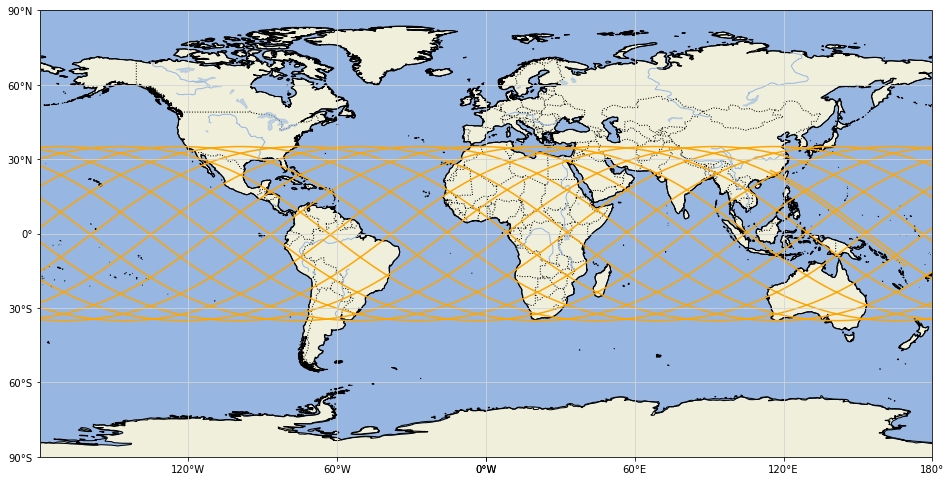

In [8]:
from IPython.display import HTML

# Size of the Figure
plt.figure(figsize=(16, 20))

# Label axes of a Plate Carree projection with a central longitude of 180:
ax1 = plt.subplot(211, projection=ccrs.PlateCarree(central_longitude=0))
ax1.set_global()

# Plot CYGNSS SC Lat/Lon
plt.plot(lon, lat, color='orange', transform=ccrs.Geodetic())

# Plot Characteristics
ax1.coastlines(resolution='50m', color='black')
ax1.gridlines(color='lightgrey', linestyle='-')
ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Plot Features
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.add_feature(cfeature.RIVERS)

# Save the Map as a file
plt.savefig('CYGNSS.png')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'ax_1' is not defined

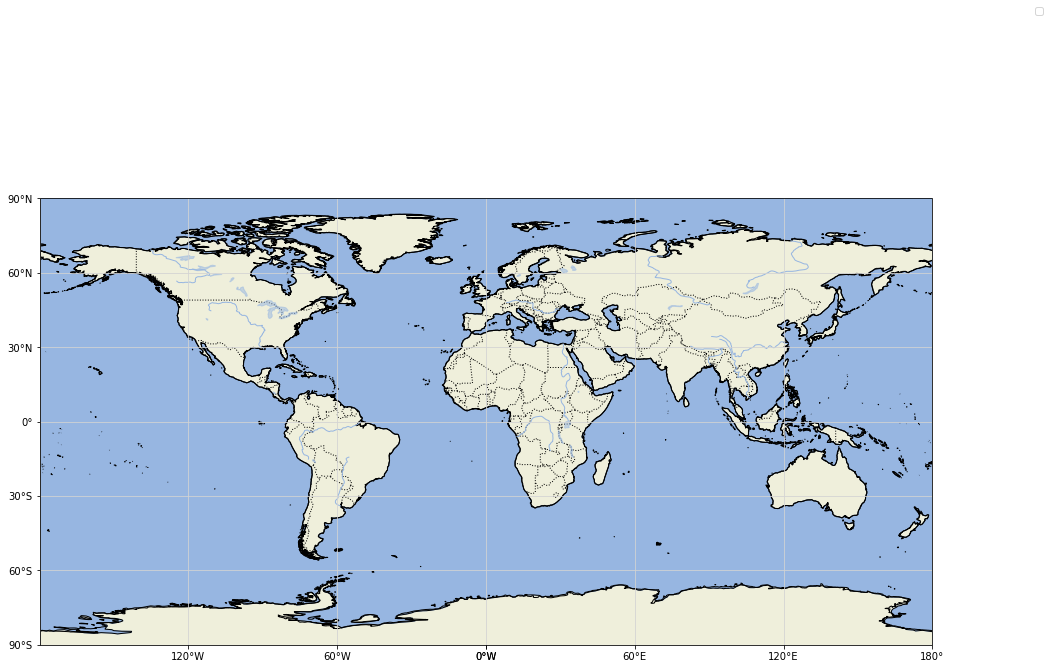

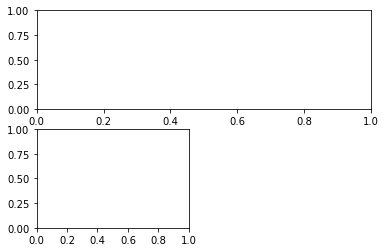

In [9]:
# Size of the Figure
fig = plt.figure(figsize=(16, 20))

# Label axes of a Plate Carree projection with a central longitude of 180:
ax1 = plt.subplot(211, projection=ccrs.PlateCarree(central_longitude=0))
ax1.set_global()

# Plot Characteristics
ax1.coastlines(resolution='50m', color='black')
ax1.gridlines(color='lightgrey', linestyle='-')
ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Plot Features
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.add_feature(cfeature.RIVERS)

ax1.legend(bbox_to_anchor=(1, 1),
          bbox_transform=fig.transFigure)
fig, ax1 = plt.subplot_mosaic([['top', 'top'], ['bottom', 'BLANK']],
                                  empty_sentinel="BLANK")
ax_1['top'].plot([1, 2, 3], label="test1")
ax_1['top'].plot([3, 2, 1], label="test2")

# Plot CYGNSS SC Lat/Lon
#plt.plot(lon, lat, color='green', transform=ccrs.Geodetic())

# Save the Map as a file
#plt.savefig('CYGNSS.png')


plt.show()

#HTML(animation.to_jshtml())

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

x = []
y = []

figure, ax = plt.subplots()

# Setting limits for x and y axis
ax.set_xlim(0, 100)
ax.set_ylim(0, 12)

# Since plotting a single graph
line, = ax.plot(0, 0)

def animation_function(i):
    x.append(i * 15)
    y.append(i)

    line.set_xdata(x)
    line.set_ydata(y)
    return line

animation = FuncAnimation(figure, func = animation_function,frames = np.arange(0, 10, 0.1), 
interval = 10)

plt.show()


HTML(animation.to_jshtml())

In [ ]:
lat_0 = lat[1]
lon_0 = lon[0]

print (lat_0)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
fig, ax = plt.subplots()
ims = []
x = np.arange(10)

ax.set_xlim(0, 9)
ax.set_ylim(0, 1)

def update_anim(i):
    y = np.random.rand(10)
    if len(ims) > 0:
        im = ims.pop()
        im.remove()
    im, = ax.plot(x, y)
    ims.append(im)

anim = FuncAnimation(fig, update_anim, interval=1000)
fig.show()

HTML(animation.to_jshtml())